In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1 Load dataset

In [90]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [91]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 2 Data Exploratory

In [92]:
df['Sex'].value_counts(normalize = True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


In [93]:
df['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


## 2.1 Categorical data

In [94]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [95]:
for feature in ['Survived', 'Pclass', 'SibSp', 'Parch' ]:
    df[feature] = df[feature].astype('category')
for feature in ['Pclass', 'SibSp', 'Parch']:
    df_test[feature] = df_test[feature].astype('category')



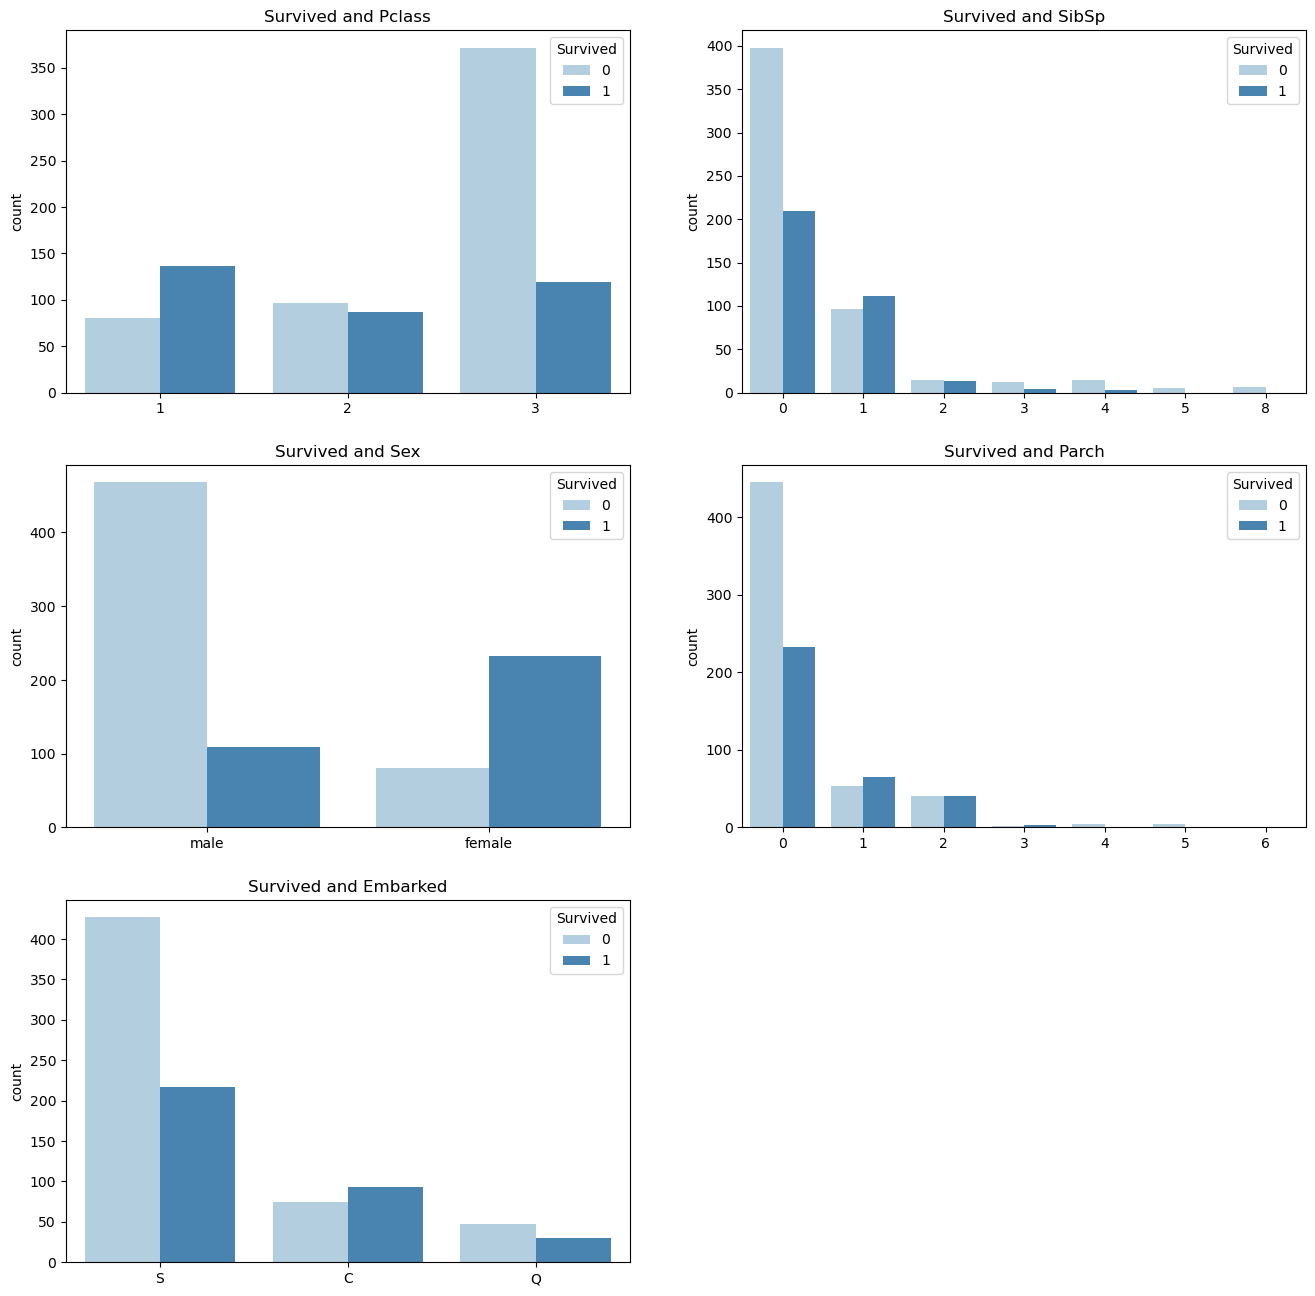

In [96]:
fig, axes = plt.subplots(3, 2, figsize = (16, 16))
axes = axes.flatten()

for i, feature in enumerate(['Pclass', 'SibSp', 'Sex', 'Parch', 'Embarked']):
    sns.countplot(data = df, x = feature, hue = 'Survived', palette = 'Blues', ax = axes[i])
    axes[i].set_xlabel('')
    axes[i].set_title(f'Survived and {feature}')

axes.flat[-1].set_visible(False)
plt.show()


## 2.2 Numerical featue

In [97]:
df.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


<Axes: xlabel='Age', ylabel='Count'>

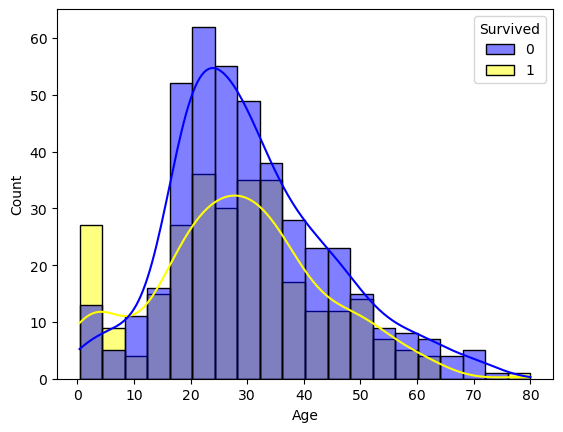

In [98]:
sns.histplot(data = df, x = 'Age', hue = 'Survived', kde = True, palette = ['blue', 'yellow'])

<Axes: xlabel='Fare', ylabel='Count'>

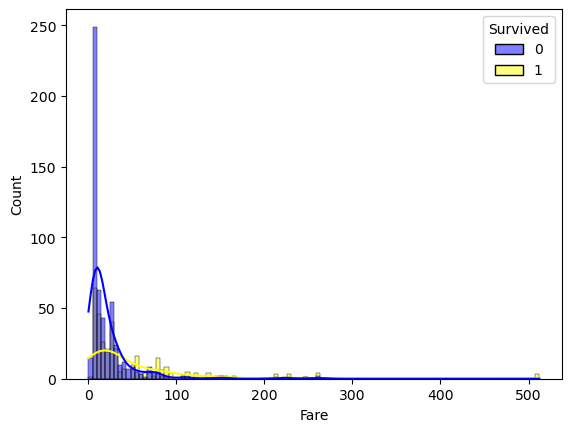

In [99]:
sns.histplot(data = df, x = 'Fare', hue = 'Survived', kde = True, palette = ['blue', 'yellow'])

In [100]:
Fare_list = ['economic', 'normal', 'intermediate', 'business']
data = df.copy()
data['Fare'] = pd.qcut(data['Fare'], 4, labels = Fare_list )




<Axes: xlabel='Fare', ylabel='count'>

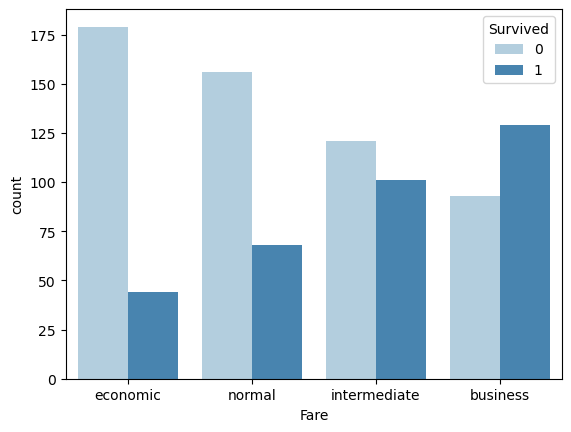

In [101]:
sns.countplot(data = data, x = 'Fare', hue = 'Survived', palette = 'Blues')

# Feature Engineering

## 1.Missing value

In [102]:
def check_missing(df):
    missing_list = []
    for feature in df.columns:
            
        missings = df[feature].isnull().sum()
        if missings !=0:
            missing_list.append(feature)
            print(f'Column {feature} has {missings*100/len(df):.3f} missing values')
    if missing_list == []:
        print('There is no missing values')

In [103]:
check_missing(df)

Column Age has 19.865 missing values
Column Cabin has 77.104 missing values
Column Embarked has 0.224 missing values


In [104]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median())).reset_index(level = [0, 1], drop = True)


In [105]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median())).reset_index(level = [0, 1], drop = True)


In [106]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [107]:
df.drop('Cabin', axis = 1, inplace = True)

In [108]:
check_missing(df)

There is no missing values


In [109]:
check_missing(df_test)

Column Age has 20.574 missing values
Column Fare has 0.239 missing values
Column Cabin has 78.230 missing values


In [110]:
df_test.drop('Cabin', axis = 1, inplace = True)

In [111]:
df_test['Age'] = df_test.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median())).reset_index(level = [0, 1], drop = True)

In [112]:
df_test['Fare'].fillna(df_test['Fare'].median(), inplace = True)

In [113]:
check_missing(df_test)

There is no missing values


# 4. Train model

In [119]:
numerical_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

x = df[numerical_features + categorical_features]
y = df[['Survived']]


In [120]:
x.head()

,Age,Fare,Pclass,Sex,SibSp,Parch,Embarked
0,22.0,7.2500,3,male,1,0,S
1,38.0,71.2833,1,female,1,0,C
2,26.0,7.9250,3,female,0,0,S
3,35.0,53.1000,1,female,1,0,S
4,35.0,8.0500,3,male,0,0,S


In [124]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

preprocessor.fit(x)
x = preprocessor.transform(x)





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.linear import LogisticRegression

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_val)



In [ ]:
precision_score(y_val, y_ped), recall_score(y_val, y_)